Streaming output truncated to the last 5000 lines.
Epoch 101/200
4/4 [==============================] - 0s 9ms/step - loss: 0.1433 - accuracy: 0.5782 - val_loss: 0.1475 - val_accuracy: 0.6419
Epoch 102/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1428 - accuracy: 0.5873 - val_loss: 0.1470 - val_accuracy: 0.6486
Epoch 103/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1423 - accuracy: 0.6077 - val_loss: 0.1465 - val_accuracy: 0.6554
Epoch 104/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1417 - accuracy: 0.6145 - val_loss: 0.1460 - val_accuracy: 0.6689
Epoch 105/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1412 - accuracy: 0.6190 - val_loss: 0.1455 - val_accuracy: 0.6689
Epoch 106/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1407 - accuracy: 0.6213 - val_loss: 0.1450 - val_accuracy: 0.6824
Epoch 107/200
4/4 [==============================] - 0s 10ms/step - loss: 0.1402 - accuracy: 0.623

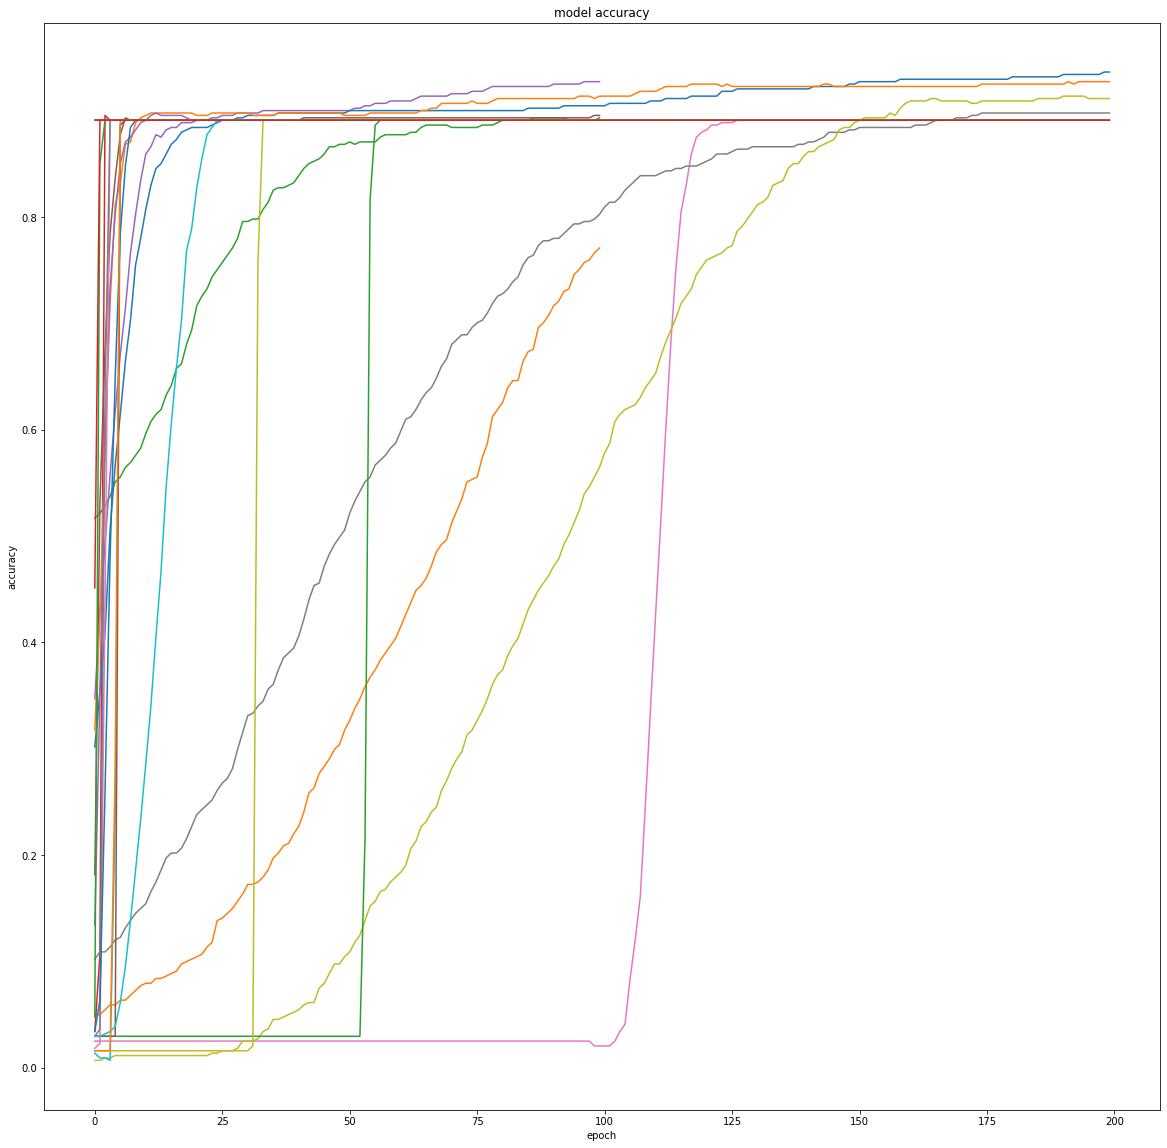

5/5 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.8986


In [ ]:
#####################################################################################################################
#   Assignment 2: Neural Network Analysis
#   This is a starter code in Python 3.6 for a neural network.
#   You need to have numpy and pandas installed before running this code.
#   You need to complete all TODO marked sections
#   You are free to modify this code in any way you want, but need to mention it
#       in the README file.
#
#####################################################################################################################


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import datasets
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical


class NeuralNet:
    def __init__(self, dataFile, header=True):
        self.raw_input = pd.read_csv(dataFile)


    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    #   categorical to numerical, etc
    def preprocess(self):
        self.processed_data = self.raw_input
        self.processed_data = self.processed_data.drop(self.processed_data.columns[[0]], axis=1)
        # drop missing values
        self.processed_data = self.processed_data.dropna(axis=0, how="any")
        self.processed_data = self.processed_data.reset_index(drop=True)
        # drop duplicate values
        self.processed_data = self.processed_data.drop_duplicates(keep="first")
        # converting from categorical to numerical
        self.processed_data['Sex'] = pd.factorize(self.processed_data.Sex)[0]
        self.processed_data['Category'] = self.processed_data['Category'].astype('category').cat.codes
        # standardizing data
        s = StandardScaler()
        self.processed_data[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']] = pd.DataFrame(s.fit_transform(self.processed_data[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]))
        return 0

    # TODO: Train and evaluate models for all combinations of parameters
    # specified in the init method. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model

    def train_evaluate(self):
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        # made some adjustments since we are trying to predict category which is the first column
        X = self.processed_data.iloc[:, 1:(ncols)]
        y = self.processed_data.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(X, y)

        # Below are the hyperparameters that you need to use for model
        #   evaluation
        activations = ['sigmoid', 'tanh', 'relu']
        learning_rate = [0.01, 0.1]
        max_iterations = [100, 200] # also known as epochs
        num_hidden_layers = [2, 3]

        # Create the neural network and be sure to keep track of the performance
        #   metrics
        
        # creating neural networks and evaluating
        nn1 = Sequential()
        nn1.add(Dense(50, input_dim=12, activation=activations[0]))
        nn1.add(Dense(8, activation=activations[0]))
        nn1.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn1.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        y_train  = to_categorical(y_train)
        y_test = to_categorical(y_test)
        history1 = nn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn2 = Sequential()
        nn2.add(Dense(50, input_dim=12, activation=activations[1]))
        nn2.add(Dense(8, activation=activations[1]))
        nn2.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn2.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history2 = nn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn3 = Sequential()
        nn3.add(Dense(50, input_dim=12, activation=activations[2]))
        nn3.add(Dense(8, activation=activations[2]))
        nn3.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn3.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history3 = nn3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn4 = Sequential()
        nn4.add(Dense(50, input_dim=12, activation=activations[0]))
        nn4.add(Dense(8, activation=activations[0]))
        nn4.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn4.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history4 = nn4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn5 = Sequential()
        nn5.add(Dense(50, input_dim=12, activation=activations[1]))
        nn5.add(Dense(8, activation=activations[1]))
        nn5.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn5.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history5 = nn5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn6 = Sequential()
        nn6.add(Dense(50, input_dim=12, activation=activations[2]))
        nn6.add(Dense(8, activation=activations[2]))
        nn6.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn6.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history6 = nn6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn7 = Sequential()
        nn7.add(Dense(50, input_dim=12, activation=activations[0]))
        nn7.add(Dense(8, activation=activations[0]))
        nn7.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn7.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history7 = nn7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn8 = Sequential()
        nn8.add(Dense(50, input_dim=12, activation=activations[1]))
        nn8.add(Dense(8, activation=activations[1]))
        nn8.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn8.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history8 = nn8.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn9 = Sequential()
        nn9.add(Dense(50, input_dim=12, activation=activations[2]))
        nn9.add(Dense(8, activation=activations[2]))
        nn9.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn9.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history9 = nn9.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn10 = Sequential()
        nn10.add(Dense(50, input_dim=12, activation=activations[0]))
        nn10.add(Dense(8, activation=activations[0]))
        nn10.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn10.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history10 = nn10.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn11 = Sequential()
        nn11.add(Dense(50, input_dim=12, activation=activations[1]))
        nn11.add(Dense(8, activation=activations[1]))
        nn11.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn11.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history11 = nn11.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn12 = Sequential()
        nn12.add(Dense(50, input_dim=12, activation=activations[2]))
        nn12.add(Dense(8, activation=activations[2]))
        nn12.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn12.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history12 = nn12.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn13 = Sequential()
        nn13.add(Dense(50, input_dim=12, activation=activations[0]))
        nn13.add(Dense(50, activation=activations[0]))
        nn13.add(Dense(8, activation=activations[0]))
        nn13.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn13.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history13 = nn13.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn14 = Sequential()
        nn14.add(Dense(50, input_dim=12, activation=activations[1]))
        nn14.add(Dense(50, activation=activations[0]))
        nn14.add(Dense(8, activation=activations[1]))
        nn14.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn14.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history14 = nn14.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn15 = Sequential()
        nn15.add(Dense(50, input_dim=12, activation=activations[2]))
        nn15.add(Dense(50, activation=activations[0]))
        nn15.add(Dense(8, activation=activations[2]))
        nn15.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn15.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history15 = nn15.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn16 = Sequential()
        nn16.add(Dense(50, input_dim=12, activation=activations[0]))
        nn16.add(Dense(50, activation=activations[0]))
        nn16.add(Dense(8, activation=activations[0]))
        nn16.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn16.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history16 = nn16.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn17 = Sequential()
        nn17.add(Dense(50, input_dim=12, activation=activations[1]))
        nn17.add(Dense(50, activation=activations[0]))
        nn17.add(Dense(8, activation=activations[1]))
        nn17.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn17.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history17 = nn17.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn18 = Sequential()
        nn18.add(Dense(50, input_dim=12, activation=activations[2]))
        nn18.add(Dense(50, activation=activations[0]))
        nn18.add(Dense(8, activation=activations[2]))
        nn18.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn18.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history18 = nn18.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[0], batch_size=128)

        nn19 = Sequential()
        nn19.add(Dense(50, input_dim=12, activation=activations[0]))
        nn19.add(Dense(50, activation=activations[0]))
        nn19.add(Dense(8, activation=activations[0]))
        nn19.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn19.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history19 = nn19.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn20 = Sequential()
        nn20.add(Dense(50, input_dim=12, activation=activations[1]))
        nn20.add(Dense(50, activation=activations[0]))
        nn20.add(Dense(8, activation=activations[1]))
        nn20.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn20.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history20 = nn20.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn21 = Sequential()
        nn21.add(Dense(50, input_dim=12, activation=activations[2]))
        nn21.add(Dense(50, activation=activations[0]))
        nn21.add(Dense(8, activation=activations[2]))
        nn21.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[0])
        nn21.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history21 = nn21.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn22 = Sequential()
        nn22.add(Dense(50, input_dim=12, activation=activations[0]))
        nn22.add(Dense(50, activation=activations[0]))
        nn22.add(Dense(8, activation=activations[0]))
        nn22.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn22.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history22 = nn22.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn23 = Sequential()
        nn23.add(Dense(50, input_dim=12, activation=activations[1]))
        nn23.add(Dense(50, activation=activations[0]))
        nn23.add(Dense(8, activation=activations[1]))
        nn23.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn23.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history23 = nn23.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        nn24 = Sequential()
        nn24.add(Dense(50, input_dim=12, activation=activations[2]))
        nn24.add(Dense(50, activation=activations[0]))
        nn24.add(Dense(8, activation=activations[2]))
        nn24.add(Dense(5, activation='softmax')) 
        opt = SGD(learning_rate=learning_rate[1])
        nn24.compile(optimizer=opt,
                loss='mean_squared_error',
                metrics=['accuracy'])
        history24 = nn24.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=max_iterations[1], batch_size=128)

        # Plot the model history for each model in a single plot
        # model history is a plot of accuracy vs number of epochs
        # you may want to create a large sized plot to show multiple lines
        # in a same figure.
        plt.rcParams["figure.figsize"] = (20,20)
        plt.plot(history1.history['accuracy'])
        plt.plot(history2.history['accuracy'])
        plt.plot(history3.history['accuracy'])
        plt.plot(history4.history['accuracy'])
        plt.plot(history5.history['accuracy'])
        plt.plot(history6.history['accuracy'])
        plt.plot(history7.history['accuracy'])
        plt.plot(history8.history['accuracy'])
        plt.plot(history9.history['accuracy'])
        plt.plot(history10.history['accuracy'])
        plt.plot(history11.history['accuracy'])
        plt.plot(history12.history['accuracy'])
        plt.plot(history13.history['accuracy'])
        plt.plot(history14.history['accuracy'])
        plt.plot(history15.history['accuracy'])
        plt.plot(history16.history['accuracy'])
        plt.plot(history17.history['accuracy'])
        plt.plot(history18.history['accuracy'])
        plt.plot(history19.history['accuracy'])
        plt.plot(history20.history['accuracy'])
        plt.plot(history21.history['accuracy'])
        plt.plot(history22.history['accuracy'])
        plt.plot(history23.history['accuracy'])
        plt.plot(history24.history['accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.show()

        nn1.evaluate(X_train, y_train)
        nn2.evaluate(X_train, y_train)
        nn3.evaluate(X_train, y_train)
        nn4.evaluate(X_train, y_train)
        nn5.evaluate(X_train, y_train)
        nn6.evaluate(X_train, y_train)
        nn7.evaluate(X_train, y_train)
        nn8.evaluate(X_train, y_train)
        nn9.evaluate(X_train, y_train)
        nn10.evaluate(X_train, y_train)
        nn11.evaluate(X_train, y_train)
        nn12.evaluate(X_train, y_train)
        nn13.evaluate(X_train, y_train)
        nn14.evaluate(X_train, y_train)
        nn15.evaluate(X_train, y_train)
        nn16.evaluate(X_train, y_train)
        nn17.evaluate(X_train, y_train)
        nn18.evaluate(X_train, y_train)
        nn19.evaluate(X_train, y_train)
        nn20.evaluate(X_train, y_train)
        nn21.evaluate(X_train, y_train)
        nn22.evaluate(X_train, y_train)
        nn23.evaluate(X_train, y_train)
        nn24.evaluate(X_train, y_train)

        nn1.evaluate(X_test, y_test)
        nn2.evaluate(X_test, y_test)
        nn3.evaluate(X_test, y_test)
        nn4.evaluate(X_test, y_test)
        nn5.evaluate(X_test, y_test)
        nn6.evaluate(X_test, y_test)
        nn7.evaluate(X_test, y_test)
        nn8.evaluate(X_test, y_test)
        nn9.evaluate(X_test, y_test)
        nn10.evaluate(X_test, y_test)
        nn11.evaluate(X_test, y_test)
        nn12.evaluate(X_test, y_test)
        nn13.evaluate(X_test, y_test)
        nn14.evaluate(X_test, y_test)
        nn15.evaluate(X_test, y_test)
        nn16.evaluate(X_test, y_test)
        nn17.evaluate(X_test, y_test)
        nn18.evaluate(X_test, y_test)
        nn19.evaluate(X_test, y_test)
        nn20.evaluate(X_test, y_test)
        nn21.evaluate(X_test, y_test)
        nn22.evaluate(X_test, y_test)
        nn23.evaluate(X_test, y_test)
        nn24.evaluate(X_test, y_test)
        return 0




if __name__ == "__main__":
    neural_network = NeuralNet("https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv") # put in path to your file
    neural_network.preprocess()
    neural_network.train_evaluate()
